In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline 

# 특정 위치 데이터 x,y,z 플롯
def plotTargetMark(mark, data, isSave=False):
    """
    mark : 특정 위치
    data : 타겟 환자의 FW 또는 BW 데이터
    """
    
    fig = plt.figure(figsize=(12, 4))

    ylimX = [-300, 300]
#     if mark.startswith('R'): ylimX = [-100, 200]
#     else: ylimX = [-200, 100]
    
    fig.add_subplot(131); plt.plot(data[f"{mark}_X"]); plt.ylim(ylimX); plt.title("X"); #plt.show()
    fig.add_subplot(132); plt.plot(data[f"{mark}_Y"]); plt.ylim([-2500, 2500]); plt.title("Y"); #plt.show()
    fig.add_subplot(133); plt.plot(data[f"{mark}_Z"]); plt.ylim([-500, 500]); plt.title("Z"); 
    fig.tight_layout()
    
#     if isSave == True:
#         fig.savefig(os.path.join(SAVEPATH, "fig.png"))
    fig.suptitle(mark, x=0.52, y=1.025)
    fig.show()

In [2]:
import pandas as pd
import numpy as np

from utils.datatools import *

In [3]:
UNDER_KNEE_MARKS = ["KNE", "TIB", "ANK", "TOE", "HEE"]
UNDER_ELBOW_MARKS = ["ELB", "FRM", "WRB", "WRA", "FIN"] 

In [4]:
patients = getPatientsTable()

In [5]:
patients.head()

,Patient,Category,cntFW,cntBW
0,BHY,Controls,3,3
1,CHH,Controls,3,3
2,HSH,Controls,3,3
3,JHY,Controls,3,3
4,JJG,Controls,3,3


In [6]:
CONTROL = patients[patients["Category"] == "Controls"]
PD = patients[patients["Category"] == "PD"]

In [7]:
TARGET_CATE = "Controls"
TARGET_PATIENT_INITIAL = CONTROL.iloc[0]["Patient"]

print("Target Category:", TARGET_CATE)
print("Target Patient Initial:", TARGET_PATIENT_INITIAL)

Target Category: Controls
Target Patient Initial: BHY


In [8]:
BWdata, FWdata = getPatientData(TARGET_CATE, TARGET_PATIENT_INITIAL)

In [9]:
print("BW data trials:", len(BWdata))
print("FW data trials:", len(FWdata))

BW data trials: 3
FW data trials: 3


## 1. X-Y 그리기

### 1) FW data

In [10]:
# 2d x-y 그리기 
def plot2Dxy(mark, data):
    plt.plot(data[mark+"_X"], data[mark+"_Y"])
    plt.title(mark)
    plt.xlabel("X")
    plt.ylabel("Y")

    return plt

In [24]:
# 2D x-y trial 겹쳐 그리기
def plot2Dxytrials(mark, dataList, patient_initial):
    if len(dataList) == 2:
        plt.plot(FWdata[0][mark+"_X"], FWdata[0][mark+"_Y"], 'r', 
                 FWdata[1][mark+"_X"], FWdata[1][mark+"_Y"], 'g')
    if len(dataList) == 3:
        plt.plot(FWdata[0][mark+"_X"], FWdata[0][mark+"_Y"], 'r', 
                 FWdata[1][mark+"_X"], FWdata[1][mark+"_Y"], 'g',
                 FWdata[2][mark+"_X"], FWdata[2][mark+"_Y"], 'b')
    plt.title(patient_initial + " " + mark)
    plt.xlabel("X")
    plt.ylabel("Y")    
    plt.show()

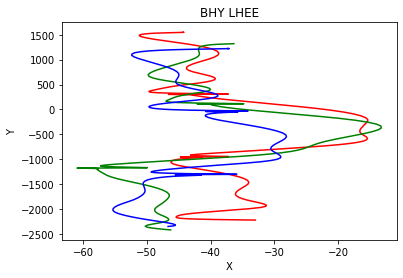

In [25]:
plot2Dxytrials("LHEE", FWdata, TARGET_PATIENT_INITIAL)

In [13]:
len(CONTROL)

22

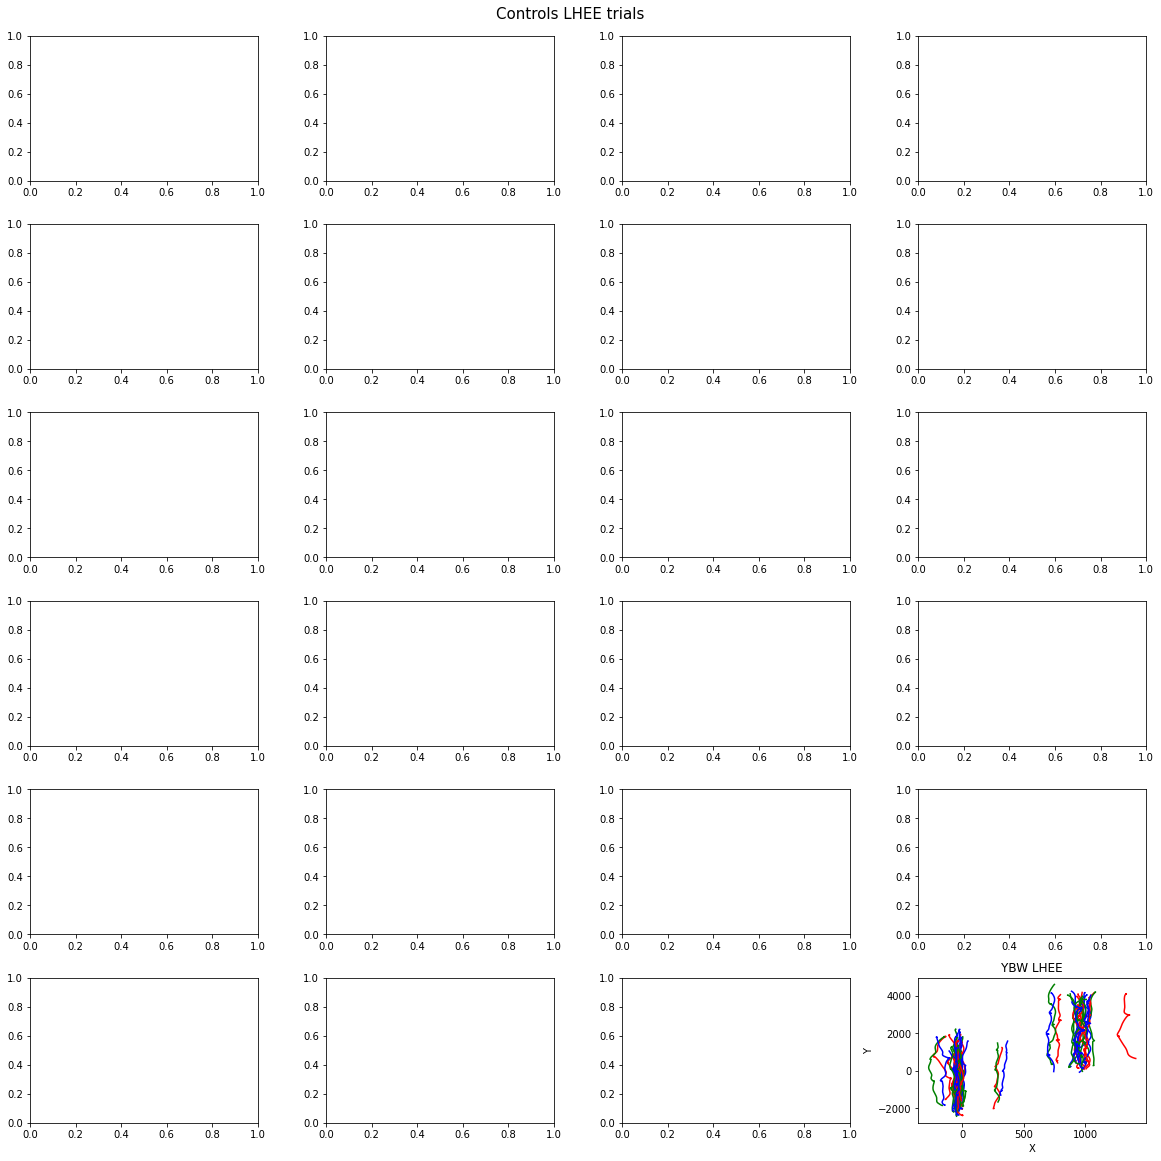

In [22]:
f, axes = plt.subplots(6,4)

for patient_initial in CONTROL["Patient"]:
    BWdata, FWdata = getPatientData("Controls", patient_initial)
    
    plot2Dxytrials("LHEE", FWdata, patient_initial)
    
f.suptitle("Controls LHEE trials", fontsize=15, x=0.5, y=0.9)
# 격자 크기 설정
f.set_size_inches((20, 20))
# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
    
plt.show()

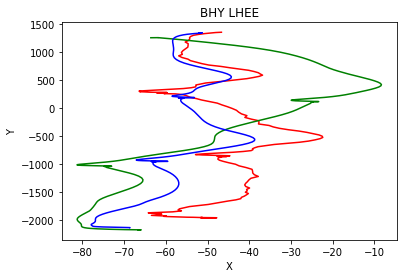

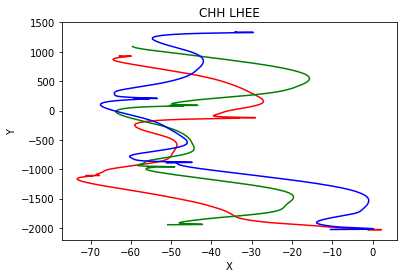

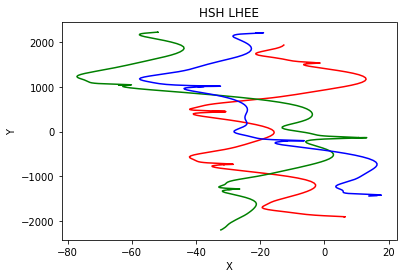

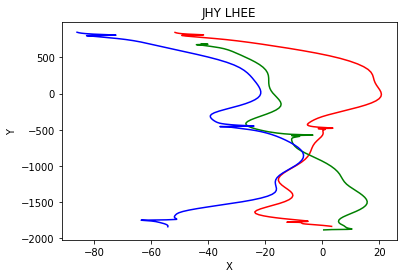

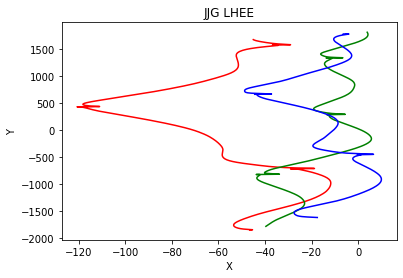

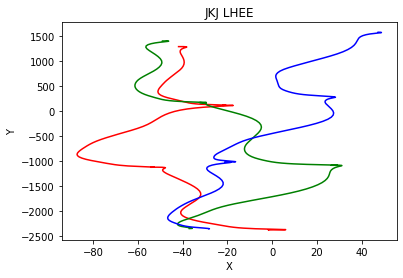

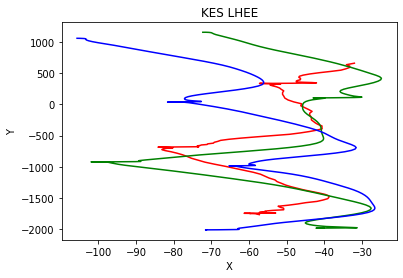

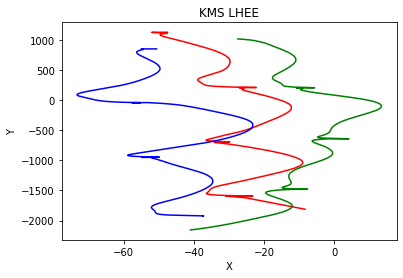

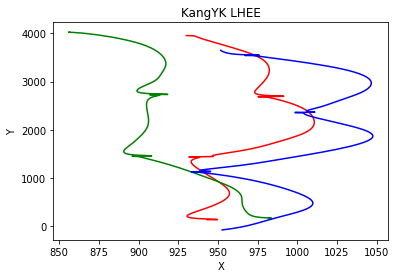

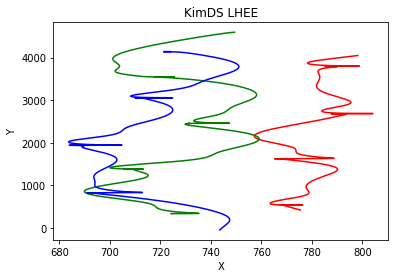

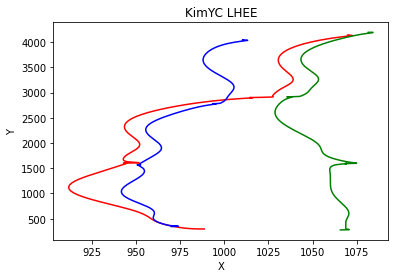

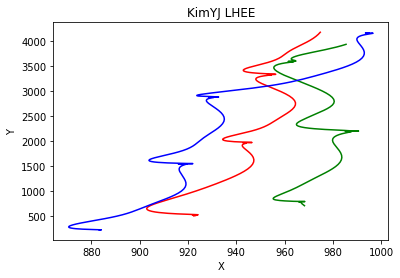

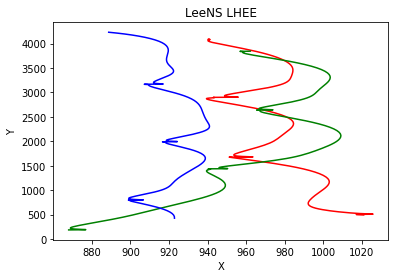

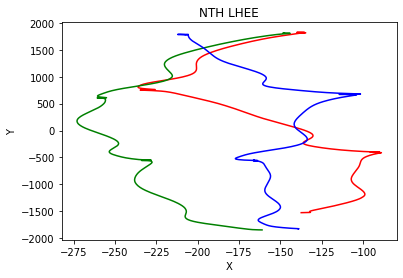

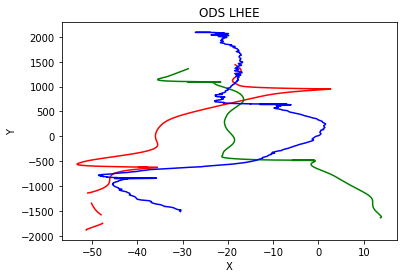

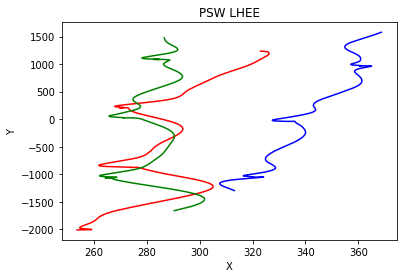

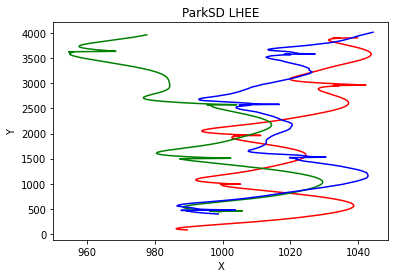

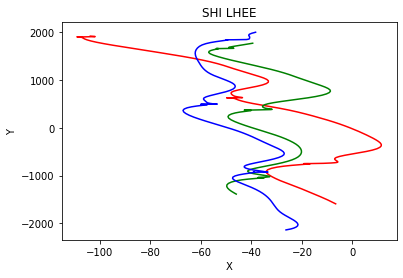

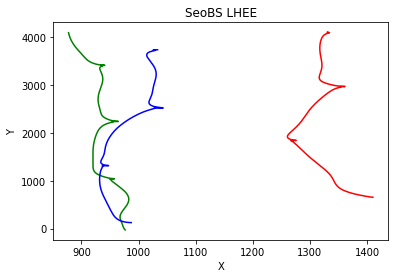

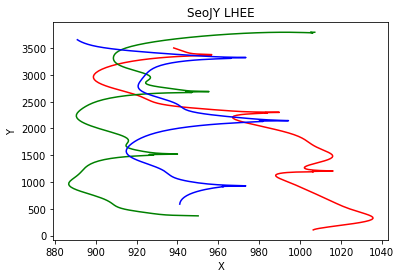

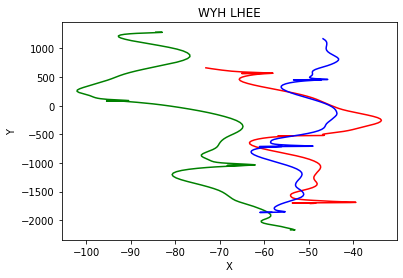

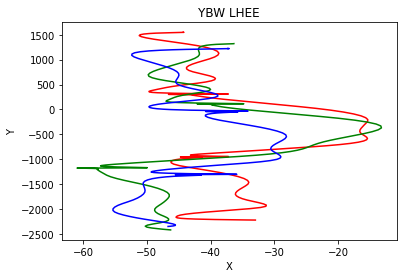

In [26]:
for patient_initial in CONTROL["Patient"]:
    BWdata, FWdata = getPatientData("Controls", patient_initial)
    plot2Dxytrials("LHEE", FWdata, patient_initial)

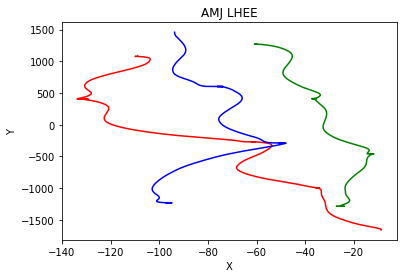

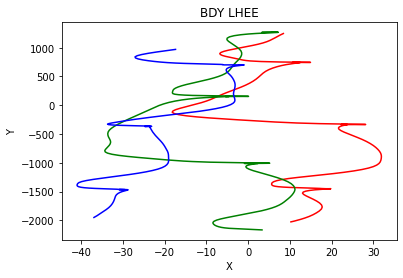

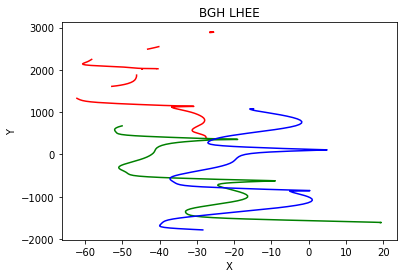

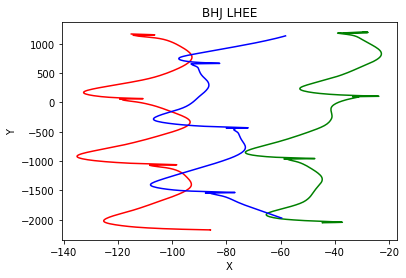

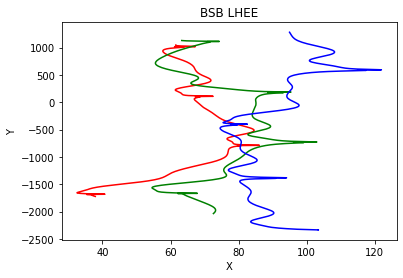

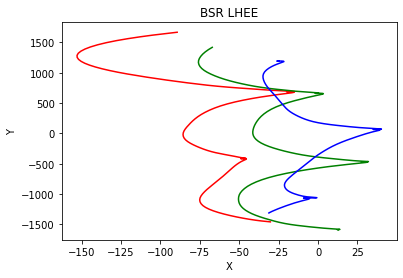

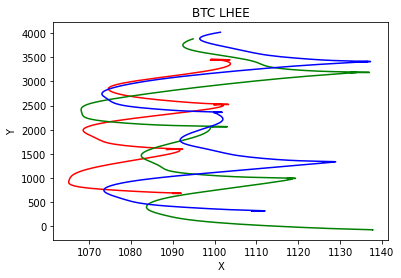

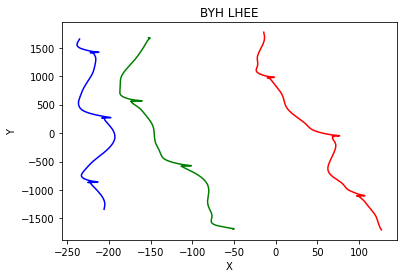

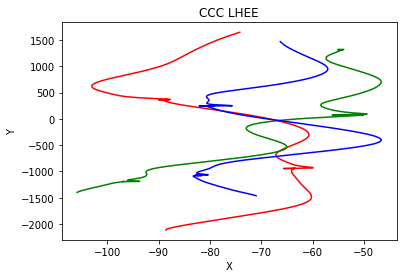

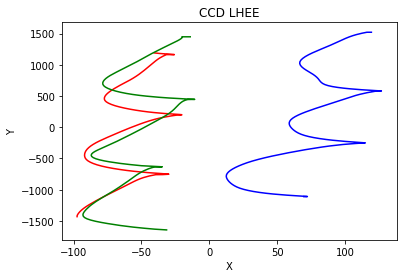

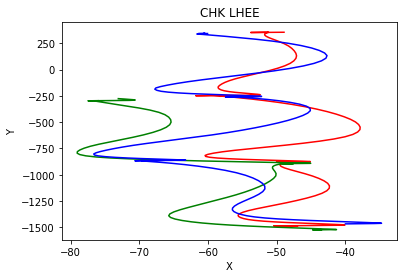

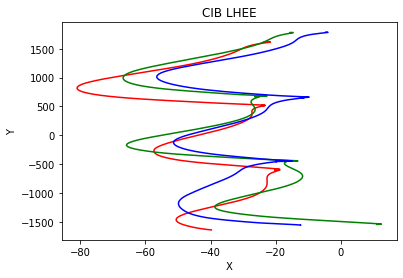

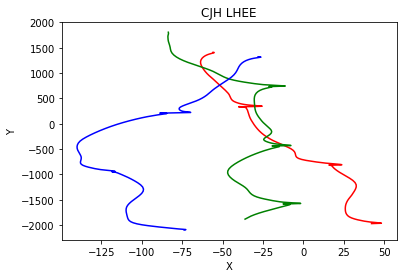

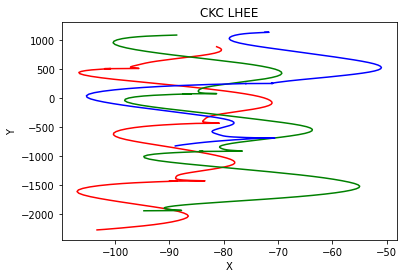

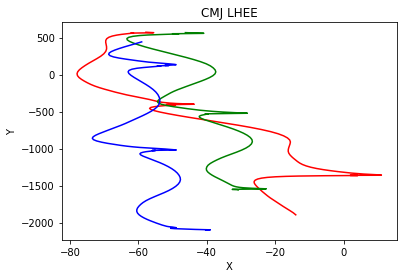

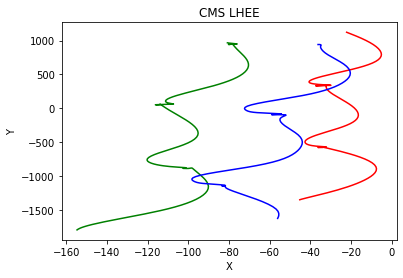

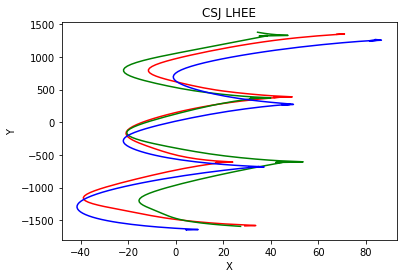

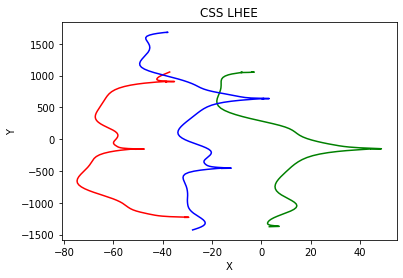

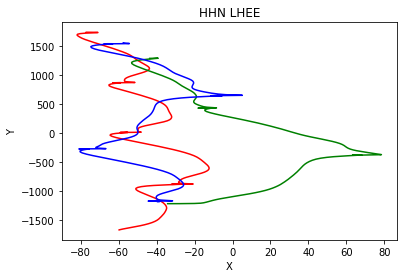

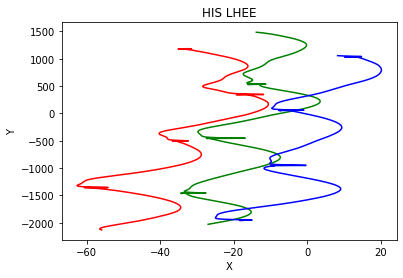

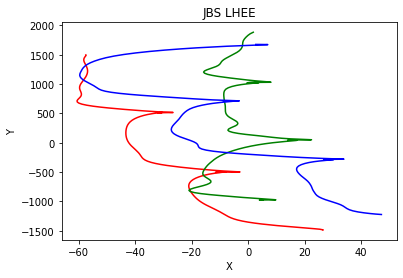

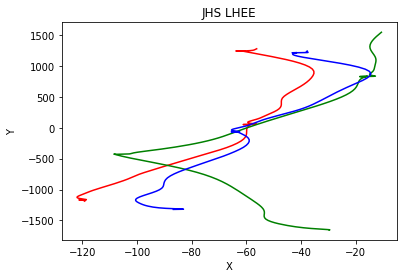

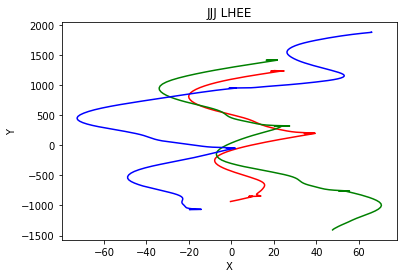

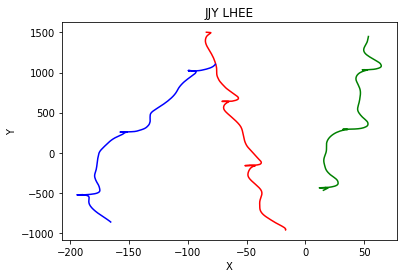

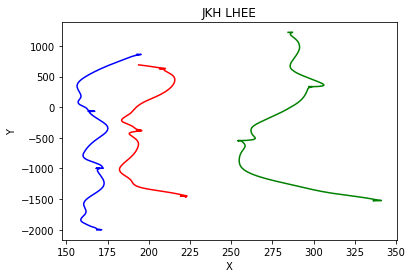

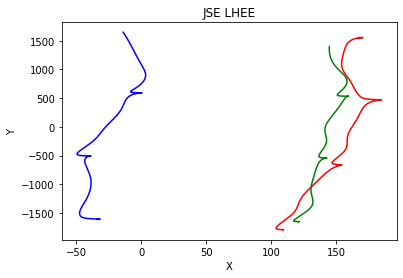

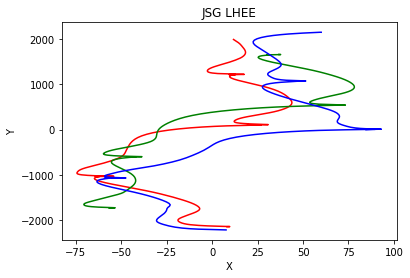

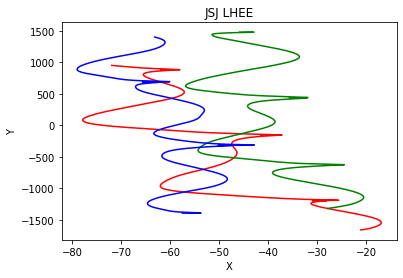

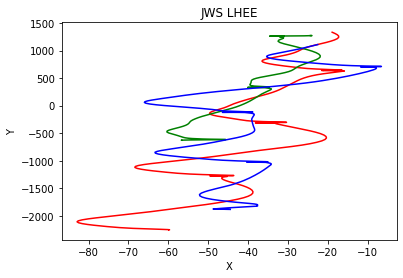

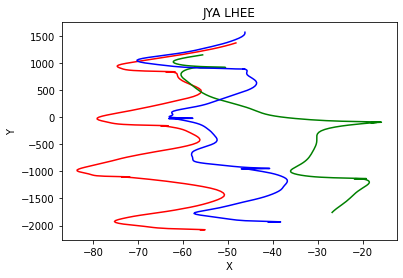

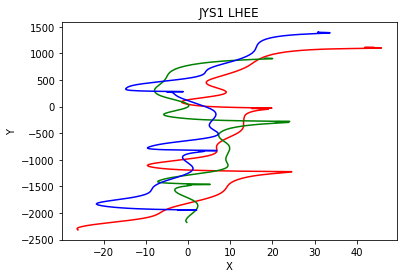

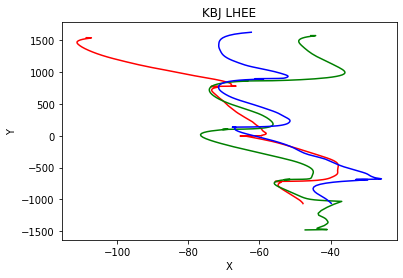

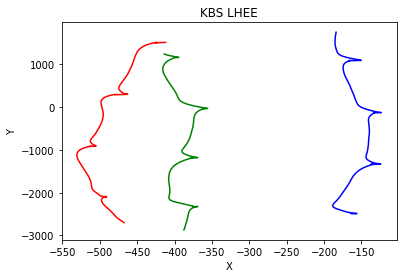

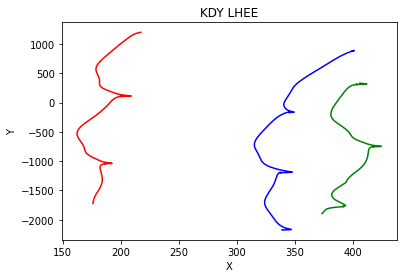

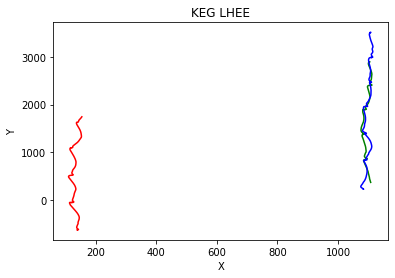

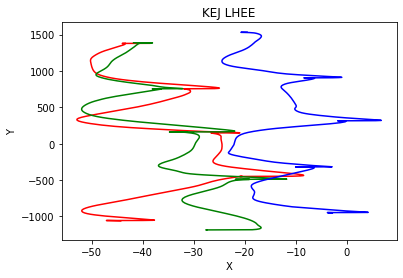

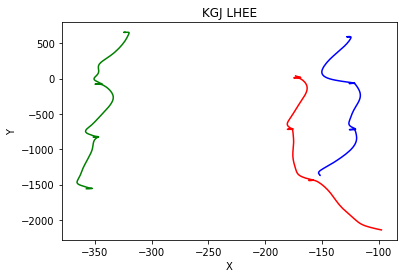

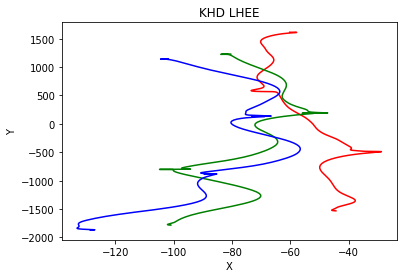

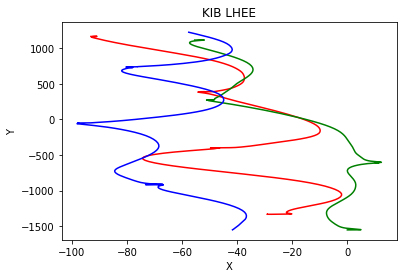

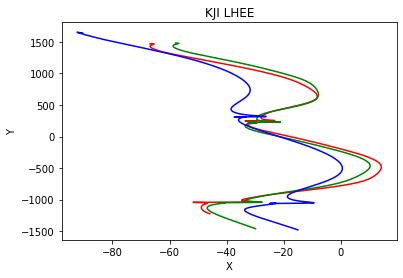

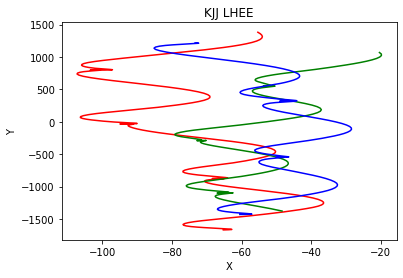

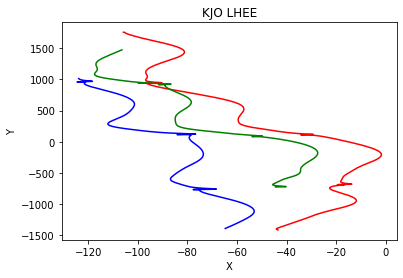

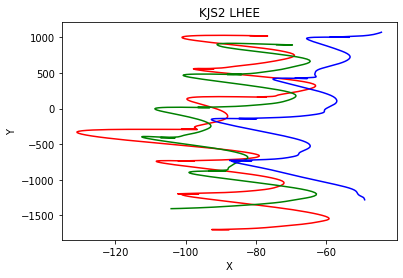

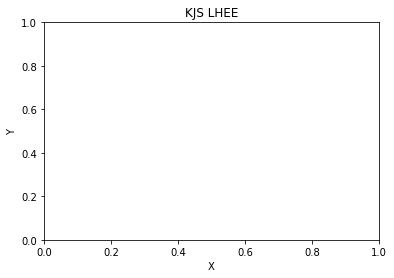

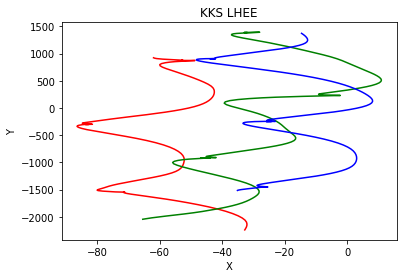

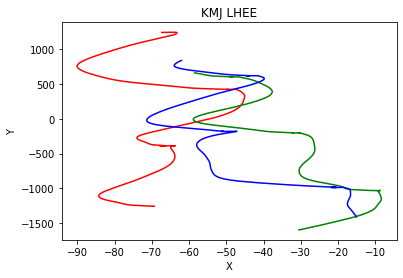

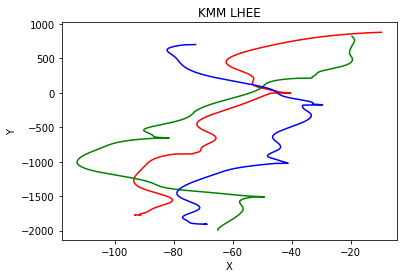

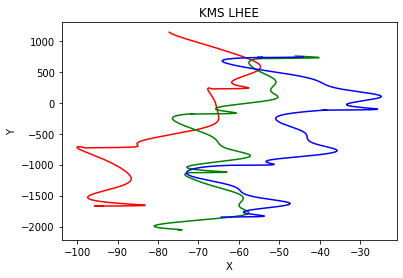

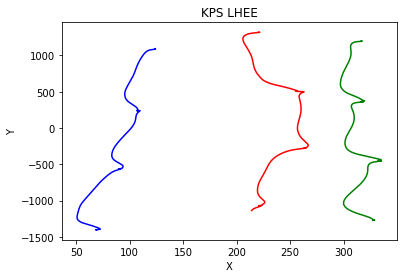

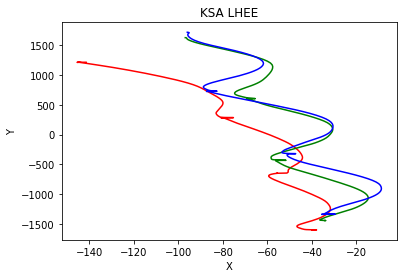

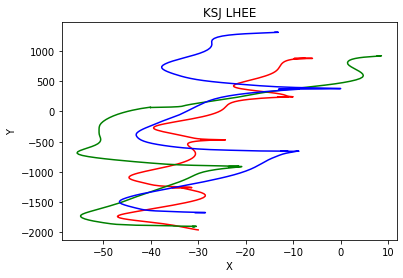

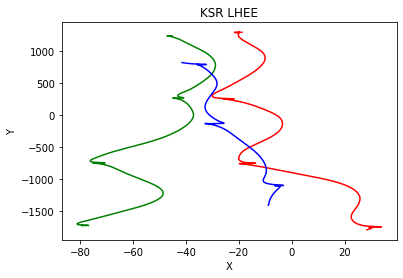

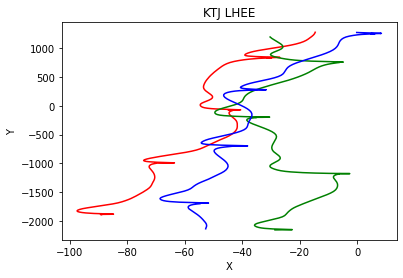

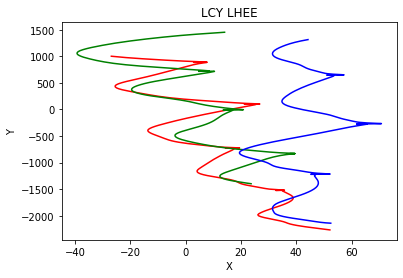

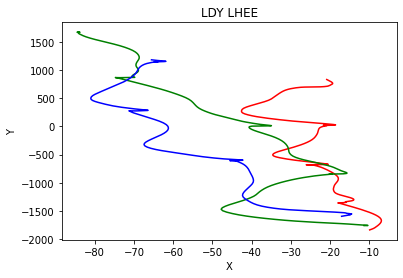

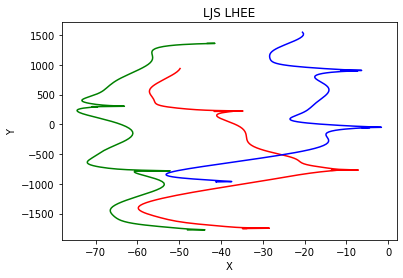

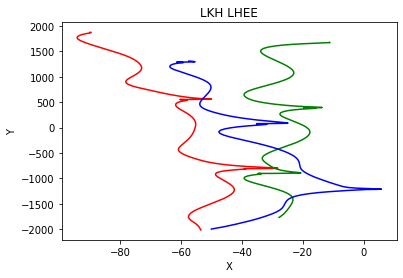

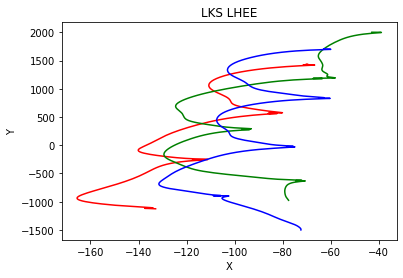

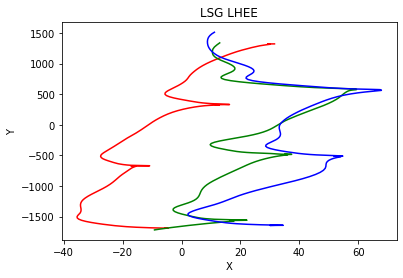

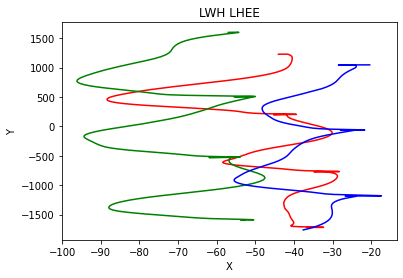

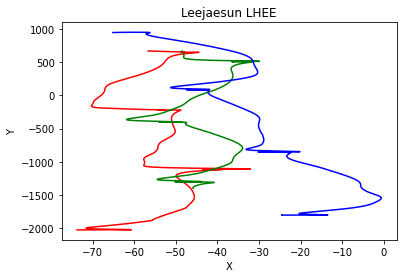

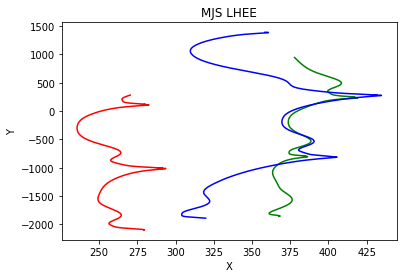

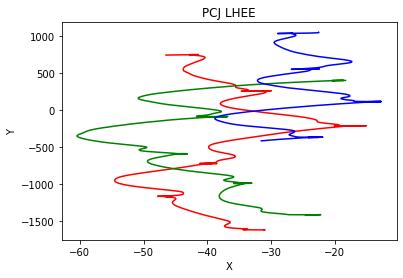

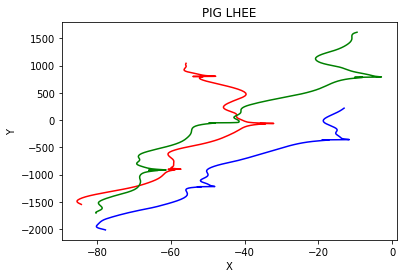

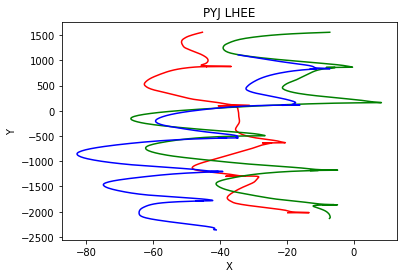

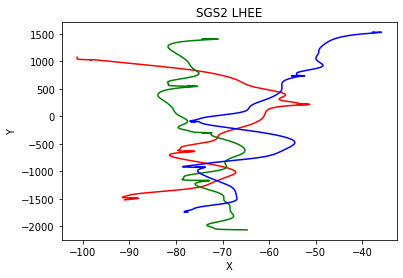

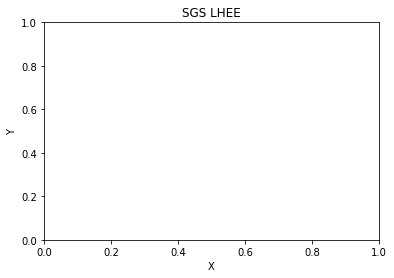

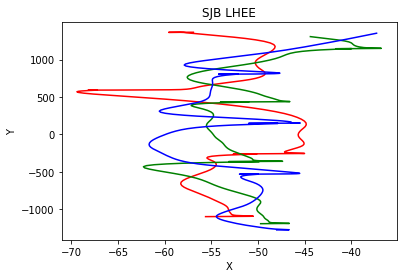

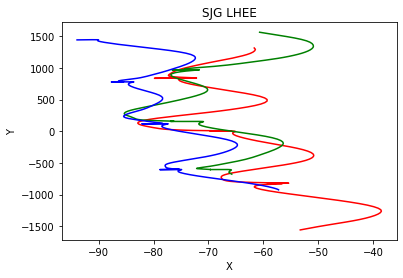

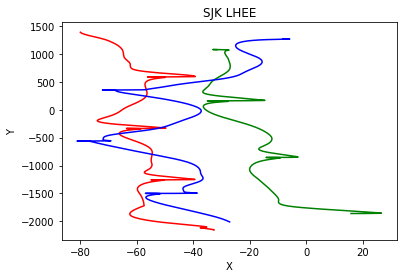

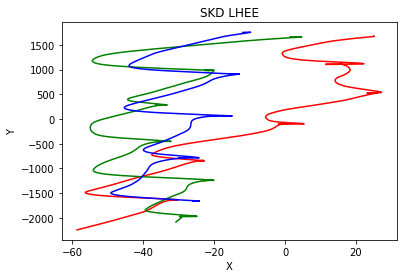

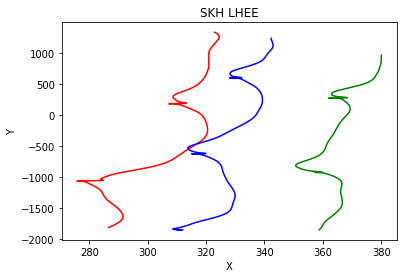

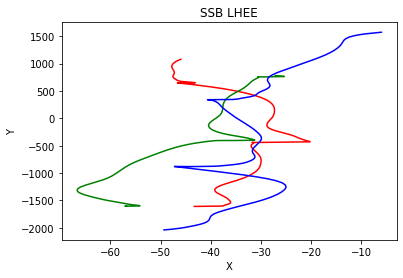

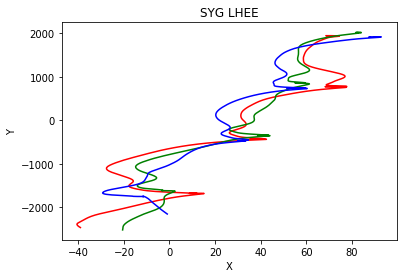

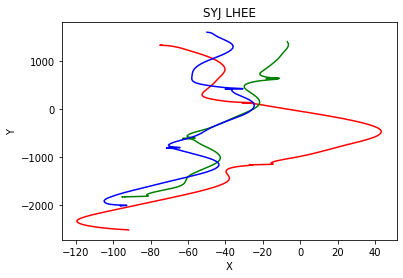

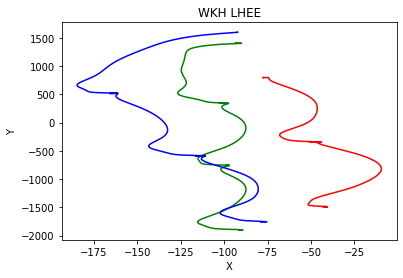

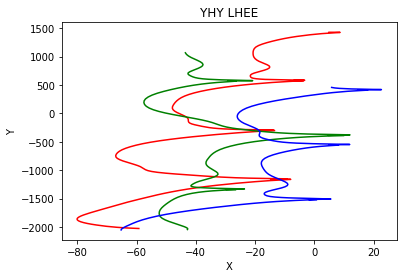

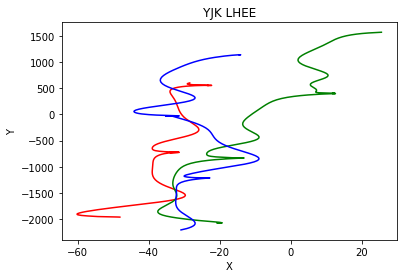

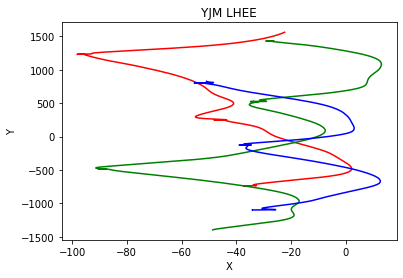

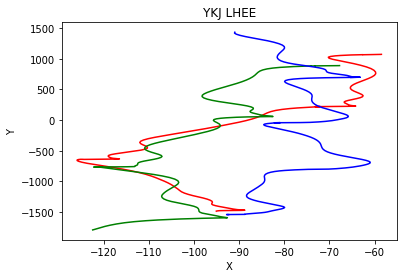

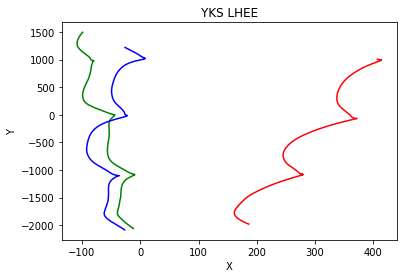

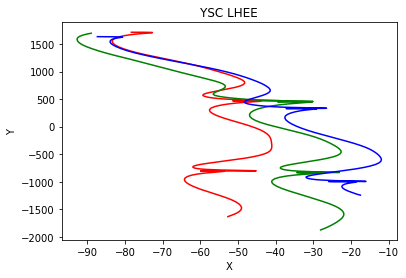

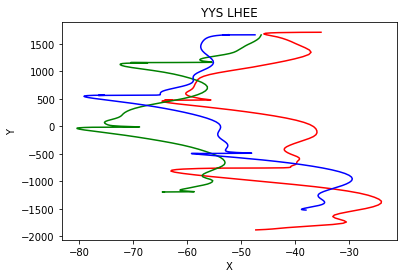

In [27]:
for patient_initial in PD["Patient"]:
    BWdata, FWdata = getPatientData("PD", patient_initial)
    plot2Dxytrials("LHEE", FWdata, patient_initial)

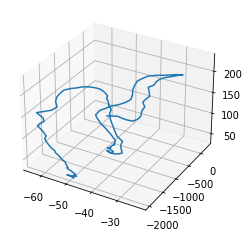

In [111]:
ax = plt.axes(projection="3d")

x_data = TARGET_TRIAL["LHEE_X"][:200]
y_data = TARGET_TRIAL["LHEE_Y"][:200]
z_data = TARGET_TRIAL["LHEE_Z"][:200]

ax.plot(x_data, y_data, z_data)

/var/folders/0z/3w3jhk9x69bbkzptbymwgxww0000gn/T/ipykernel_57033/597860240.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)
/Users/sujinlee/.virtualenvs/ml/lib/python3.9/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


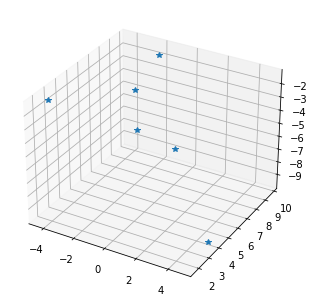

In [112]:
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
%matplotlib inline 


fig = plt.figure()
ax = p3.Axes3D(fig)

q = [[-4.32, -2.17, -2.25, 4.72, 2.97, 1.74],
     [ 2.45, 9.73,  7.45,4.01,3.42,  1.80],[-1.40, -1.76, -3.08,-9.94,-3.13,-1.13]]
v = [[ 0.0068,0.024, -0.014,-0.013, -0.0068,-0.04],[ 0.012,
      0.056, -0.022,0.016,  0.0045, 0.039],
     [-0.0045,  0.031,  0.077,0.0016, -0.015,-0.00012]]

x=np.array(q[0])
y=np.array(q[1])
z=np.array(q[2])
s=np.array(v[0])
u=np.array(v[1])
w=np.array(v[2])


points, = ax.plot(x, y, z, '*')
txt = fig.suptitle('')

def update_points(num, x, y, z, points):
    txt.set_text('num={:d}'.format(num)) # for debug purposes

    # calculate the new sets of coordinates here. The resulting arrays should have the same shape
    # as the original x,y,z
    new_x = x+np.random.normal(1,0.1, size=(len(x),))
    new_y = y+np.random.normal(1,0.1, size=(len(y),))
    new_z = z+np.random.normal(1,0.1, size=(len(z),))

    # update properties
    points.set_data(new_x,new_y)
    points.set_3d_properties(new_z, 'z')

    # return modified artists
    return points,txt

ani=animation.FuncAnimation(fig, update_points, frames=10, fargs=(x, y, z, points))

plt.show()